# Task 1

Solution Path: S -> B -> G


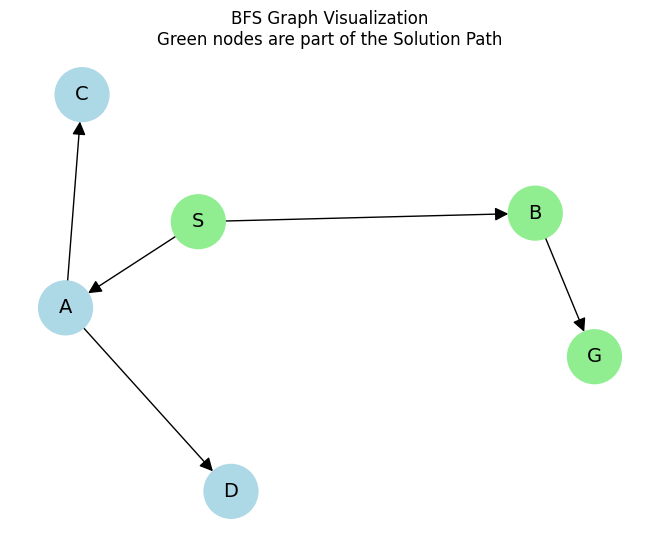

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(graph, start, goal):
    frontier = deque([start])       
    explored = set()                
    parent = {start: None}          
    
    while frontier:
        current = frontier.popleft()
        
        if current == goal:
            solution_path = []
            node = goal
            while node is not None:
                solution_path.insert(0, node)
                node = parent[node]
            return solution_path

        explored.add(current)

        for neighbor in graph.get(current, []):
            if neighbor not in explored and neighbor not in frontier:
                frontier.append(neighbor)
                parent[neighbor] = current

    return None  

graph = {
    'S': ['A', 'B'],
    'A': ['C', 'D'],
    'B': ['G'],
    'C': [],
    'D': [],
    'G': []
}

solution = bfs(graph, 'S', 'G')
print("Solution Path:", " -> ".join(solution))

G = nx.DiGraph()  

for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

node_colors = []
for node in G.nodes():
    if node in solution:
        node_colors.append('lightgreen')
    else:
        node_colors.append('lightblue')

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, arrowsize=20, font_size=14)
plt.title("BFS Graph Visualization\nGreen nodes are part of the Solution Path")
plt.show()


# Task 2 (Part 1)

Take from queue:  S
Add to queue:  A
Queue after this step: deque(['A'])
Add to queue:  B
Queue after this step: deque(['A', 'B'])
Take from queue:  A
Add to queue:  C
Queue after this step: deque(['B', 'C'])
Take from queue:  B
Take from queue:  C
Solution Path: ['S', 'A', 'C']


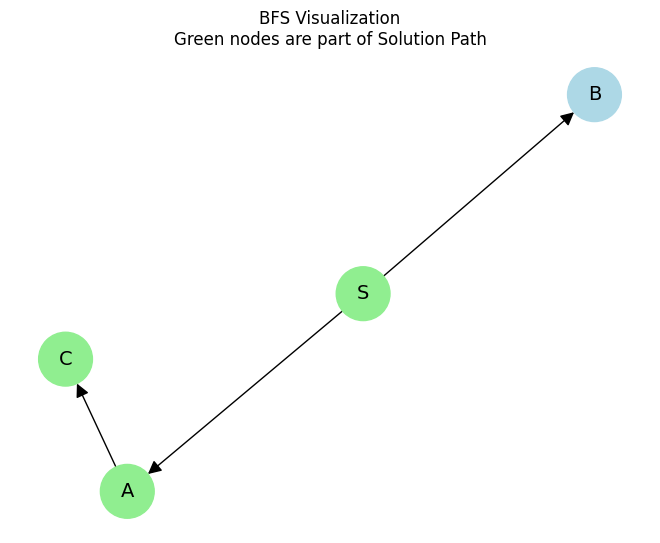

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(graph, start, goal):
    frontier = deque([start])
    parent = {start: None}          
    
    while frontier:
        current = frontier.popleft()
        print("Take from queue: ", current)

        if current == goal:
            solution_path = []
            node = goal
            while node is not None:
                solution_path.insert(0, node)
                node = parent[node]
            return solution_path

        for neighbor in graph.get(current, []):
            if neighbor not in frontier:
                frontier.append(neighbor)
                print("Add to queue: ", neighbor)
                parent[neighbor] = current
                print("Queue after this step:", frontier)
    return None  

graph = {
    'S': ['A', 'B'],
    'A': ['C'],
    'B': [],
    'C': [],
}

solution = bfs(graph, 'S', 'C')
print("Solution Path:", solution)

G = nx.DiGraph()

for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

node_colors = []
for node in G.nodes():
    if solution and node in solution:
        node_colors.append('lightgreen')
    else:
        node_colors.append('lightblue')

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, arrowsize=20, font_size=14)
plt.title("BFS Visualization\nGreen nodes are part of Solution Path")
plt.show()


# Task 2 (Part 2)

Step 1: Visiting S
  Add to queue: A
  Add to queue: B
  Queue after this step: ['A', 'B']

Step 2: Visiting A
  Add to queue: C
  Queue after this step: ['B', 'C']

Step 3: Visiting B
  Add to queue: C
  Queue after this step: ['C', 'C']

Step 4: Visiting C
  Add to queue: B
  Queue after this step: ['C', 'B']

Step 5: Visiting C
  Add to queue: B
  Queue after this step: ['B', 'B']

Step 6: Visiting B
  Add to queue: C
  Queue after this step: ['B', 'C']

Step 7: Visiting B
  Add to queue: C
  Queue after this step: ['C', 'C']



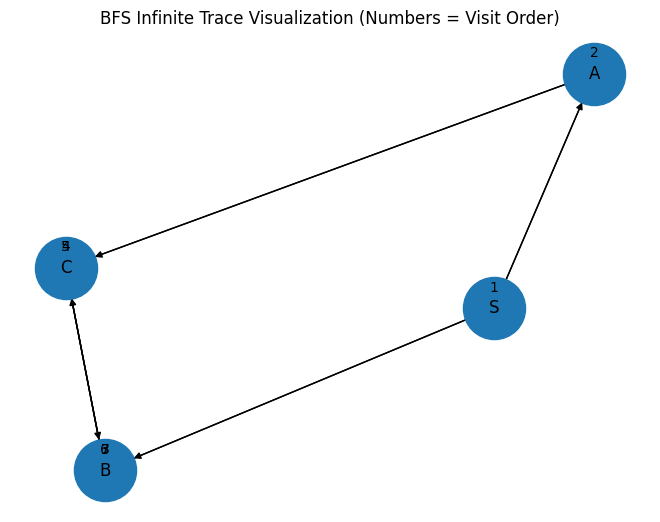

In [65]:
from collections import deque

def bfs_infinite_trace(graph, start):
    frontier = deque([start])
    step = 1
    while frontier:
        current = frontier.popleft()
        print(f"Step {step}: Visiting {current}")
        step += 1
        if step == 8:
            return 
        for neighbor in graph.get(current, []):
            frontier.append(neighbor)  
            print(f"  Add to queue: {neighbor}")
        print(f"  Queue after this step: {list(frontier)}\n")

graph = {
    'S': ['A', 'B'],
    'A': ['C'],
    'B': ['C'],  
    'C': ['B'],  
}
bfs_infinite_trace(graph, 'S')


# Task 2 (Part 3)

Step 1: Take from queue -> S
Visited: {'S'}
Add A to queue
Add B to queue
Queue after step 1: ['A', 'B']

Step 2: Take from queue -> A
Visited: {'S', 'A'}
Add C to queue
Queue after step 2: ['B', 'C']

Step 3: Take from queue -> B
Visited: {'S', 'B', 'A'}
Queue after step 3: ['C']

Step 4: Take from queue -> C
Visited: {'S', 'B', 'C', 'A'}
Goal found! Path: S → A → C


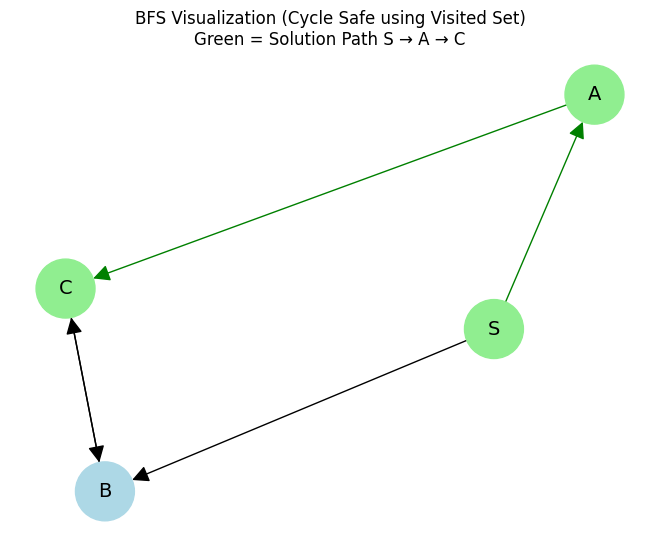

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_with_trace(graph, start, goal):
    frontier = deque([start])
    visited = set()
    parent = {start: None}

    step = 1
    while frontier:
        current = frontier.popleft()
        print(f"Step {step}: Take from queue -> {current}")

        if current in visited:
            print(f"Step {step}: {current} already visited → skip\n")
            step += 1
            continue

        visited.add(current)
        print(f"Visited: {visited}")

        if current == goal:
            path = []
            node = goal
            while node is not None:
                path.insert(0, node)
                node = parent[node]
            print(f"Goal found! Path: {' → '.join(path)}")
            return path

        for neighbor in graph.get(current, []):
            if neighbor not in visited and neighbor not in frontier:
                frontier.append(neighbor)
                parent[neighbor] = current
                print(f"Add {neighbor} to queue")

        print(f"Queue after step {step}: {list(frontier)}\n")
        step += 1

    return None

graph = {
    'S': ['A', 'B'],
    'A': ['C'],
    'B': ['C'],  # B → C
    'C': ['B'],  # C → B (cycle)
}

solution = bfs_with_trace(graph, 'S', 'C')

G = nx.DiGraph()

for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

node_colors = []
for node in G.nodes():
    if solution and node in solution:
        node_colors.append("lightgreen")
    else:
        node_colors.append("lightblue")

edge_colors = []
for u, v in G.edges():
    if solution and u in solution and v in solution and solution.index(v) == solution.index(u) + 1:
        edge_colors.append("green")
    else:
        edge_colors.append("black")

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=1800,
    arrowsize=25,
    font_size=14
)

plt.title("BFS Visualization (Cycle Safe using Visited Set)\nGreen = Solution Path S → A → C")
plt.show()


# Task 3

Visiting: S
Visiting: A
Visiting: B
Visiting: C
Visiting: G

Goal found!
Traversal Order: S → A → B → C → G
Solution Path: S → A → B → G


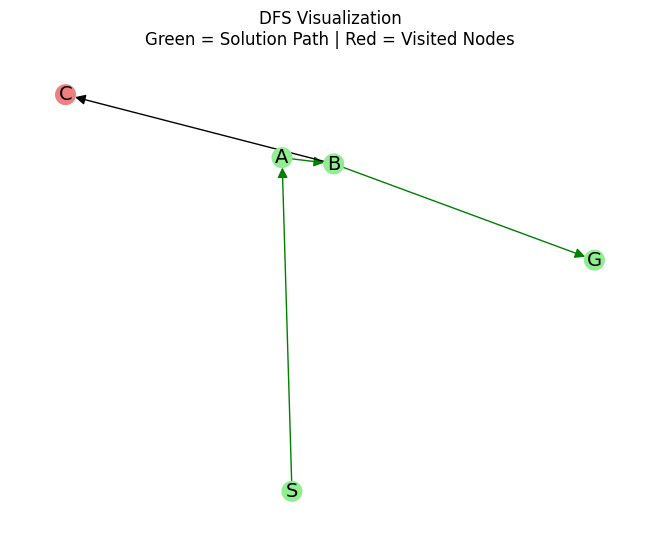

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    traversal_order = []

    while stack:
        current, path = stack.pop()
        traversal_order.append(current)
        print(f"Visiting: {current}")

        if current == goal:
            print("\nGoal found!")
            print("Traversal Order:", " → ".join(traversal_order))
            print("Solution Path:", " → ".join(path))
            return path, traversal_order

        if current not in visited:
            visited.add(current)
            for neighbor in reversed(graph.get(current, [])):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    print("\nGoal not found")
    print("Traversal Order:", " → ".join(traversal_order))
    return None, traversal_order

graph = {
    'S': ['A'],
    'A': ['B'],
    'B': ['C', 'G']
}

solution, traversal = dfs(graph, 'S', 'G')

G = nx.DiGraph()

for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

node_colors = []
for node in G.nodes():
    if solution and node in solution:
        node_colors.append("lightgreen")
    elif node in traversal:
        node_colors.append("lightcoral")  
    else:
        node_colors.append("lightblue")

edge_colors = []
for u, v in G.edges():
    if solution and u in solution and v in solution and solution.index(v) == solution.index(u) + 1:
        edge_colors.append("green")
    else:
        edge_colors.append("black")

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=200,
    arrowsize=15,
    font_size=14
)

plt.title("DFS Visualization\nGreen = Solution Path | Red = Visited Nodes")
plt.show()


# Task 4

Dequeued node: S with cumulative cost: 0
Added to frontier: A with path cost: 1
Added to frontier: B with path cost: 5
Dequeued node: A with cumulative cost: 1
Added to frontier: G with path cost: 3
Dequeued node: G with cumulative cost: 3

Optimal path: ['S', 'A', 'G']
Path cost: 3


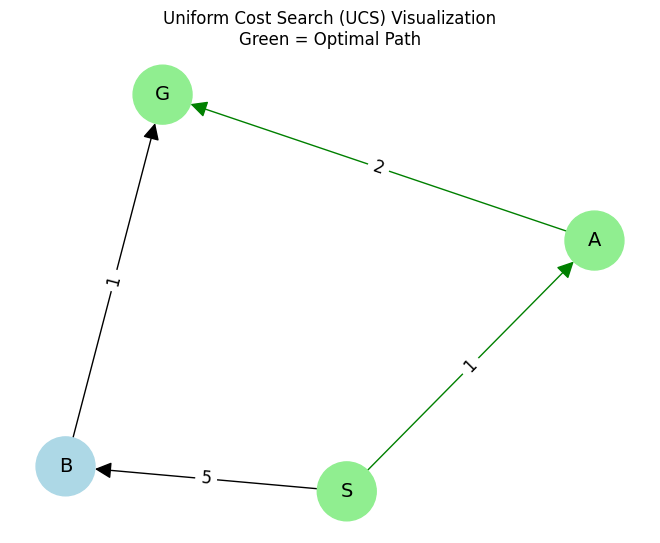

In [63]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start, [start]))
    
    explored_costs = {start: 0}
    
    while frontier:
        cost, current, path = heapq.heappop(frontier)
        print(f"Dequeued node: {current} with cumulative cost: {cost}")
        
        if current == goal:
            return path, cost
        
        for neighbor, edge_cost in graph.get(current, []):
            new_cost = cost + edge_cost
            if neighbor not in explored_costs or new_cost < explored_costs[neighbor]:
                explored_costs[neighbor] = new_cost
                heapq.heappush(frontier, (new_cost, neighbor, path + [neighbor]))
                print(f"Added to frontier: {neighbor} with path cost: {new_cost}")
    
    return None, float('inf')

graph = {
    'S': [('A', 1), ('B', 5)],
    'A': [('G', 2)],
    'B': [('G', 1)],
    'G': []
}

path, cost = uniform_cost_search(graph, 'S', 'G')

print(f"\nOptimal path: {path}")
print(f"Path cost: {cost}")

G = nx.DiGraph()

for node, neighbors in graph.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

node_colors = []
for node in G.nodes():
    if path and node in path:
        node_colors.append("lightgreen")   # solution path
    else:
        node_colors.append("lightblue")

edge_colors = []
for u, v in G.edges():
    if path and u in path and v in path and path.index(v) == path.index(u) + 1:
        edge_colors.append("green")
    else:
        edge_colors.append("black")

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=1800,
    arrowsize=25,
    font_size=14
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Uniform Cost Search (UCS) Visualization\nGreen = Optimal Path")
plt.show()
